In [1]:
import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

In [9]:
data = pd.read_csv('/content/data.csv', sep = ',', error_bad_lines=False,engine='python')

Skipping line 159744: unexpected end of data


In [10]:
data.shape

(159742, 2)

In [11]:
data.sample(5)

,text,stars
102976,"I was so happy to see a ramen restaurant in our neighborhood! I was waiting to try this restaurant for awhile and finally had the chance today.\n\nMy wife and I ordered spicy miso ramen and chicken katsu curry plate.\nFirst of all, the ramen was good. The soup was not bland and overall presentation and the quantity was good. I wish they had option to add extra noodles. The quality was good to the point that I don't think I'll have to take a trip to center city for ramen.\n\nKatsu however, seems a bit lacking. First of all, the curry taste like straight up instant Golden Curry cubes you find in Asian Market. Nothing special, there's nothing inside the curry other than curry itself. Plus they are using chicken thigh not chicken breast meat. I personally like breast for katsu, but I'm sure there are those who would careless. \nBut at the end of the day, this is not a katsu/curry restaurant hence the 4 stars. \n\nWould come back again to try the bbq and other ramen! Great addition to the neighborhood.",4
106853,"After begging my wife for years to give this place a try, based on the overwhelmingly positive YELP reviews (my wife was reluctant to get food from a gas station), she finally caved.\n\nQuite a find. Amazing food. Friendly service. Probably the best food in the area (I put the place on a par with the local TJ's).\n\nFresh food. Turkey in the turkey sandwich was real turkey and not lunch meat. Well balanced flavors. Large proportions. Reasonable prices (some items quite inexpensive!)\n\nI messed my shirt inhaling the grilled brie sandwich with fig jam but it was worth it!\n\nSalted caramel cheesecake was to die for. Best we ever had. Lady who arrived after us had come for it, but we had bought the last one.",5
123472,"I'm torn. When I graduated in 2016 I was so proud. I'm a first generation graduate. But I haven't been able to get a job. It's a regional school. They don't know anything about it on the west coast. By 2017 I was unhoused (homeless). I must mention that I came out just before graduation. I was flying high and said f*** it. But the alumni didn't want to help me clothe the homeless. I was gonna outfit them when I lived in Cali on the streets. Give em to Berkeley and Stanford unhoused residents. As a tongue-in-cheek jab at the white collar schools who cater to the rich out there. It would've put us on the map out there and also done good for ppl. C'est la vie. \n\nMy time as a double major was difficult. But they gave me the opportunity to study abroad and it opened my eyes. Abroad was where I came to terms with my sexuality and then my gender identity. It was monumental. But I was always treated by the school as a number not a person. Like tuc43202 (not my student id num but u get the gist). \n\nThe professors were incredible. The education is on par with Penn. No doubt. My professors were doctors some were published. On tv. And well known. As well as respected. Ivy League schools are only considered better bcuz rich ppl said so. They also donate more as alums. Bcuz they can. So they can fund projects and legacies. But what's written in our textbooks is the same info as the Ivy league. They don't learn alternative facts. We learn the same material from great professors. \n\nUndoubtedly I learned so much. But I commuted from home. I know the area well. It's not safe outside the campus. Which is a failure of the city. Moreover the lack of opportunity. The city is run by the rich. Rittenhouse square is so close yet so far removed from Kensington. The problem with North Philly lies in the bloody hands of capitalism. \n\nBut it's not that bad. As Temple has PA's third largest police force. They patrol like a mf. Which is good for the students but tense for the bipoc residents close by. \n\nAfter graduating I was sent an extraordinary bill. Which I will never pay back. I'm too poor. Coming out was cool but it didn't help me career wise. But so what. I'm me fu if ya don't like it. \n\nThe school was

In [15]:
data['stars'].value_counts()

5    73950
4    32869
1    24745
3    15651
2    12527
Name: stars, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['stars'], test_size = 0.2, stratify = data['stars'], random_state = 1)

In [17]:
X_train.shape

(127793,)

In [18]:
pd.Series(y_train).value_counts(normalize = True)

5    0.462936
4    0.205762
1    0.154907
3    0.097979
2    0.078416
Name: stars, dtype: float64

In [19]:
X_test.shape

(31949,)

In [20]:
pd.Series(y_test).value_counts(normalize = True)

5    0.462925
4    0.205765
1    0.154903
3    0.097969
2    0.078438
Name: stars, dtype: float64

In [21]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [22]:
X_bow = bow.fit_transform(X_train)

In [23]:
len(bow.vocabulary_)

105259

In [24]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [25]:
X_tfidf = tfidf.fit_transform(X_train)

In [26]:
len(tfidf.vocabulary_)

105259

In [27]:
bow_model = RandomForestClassifier(random_state = 2)

In [28]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

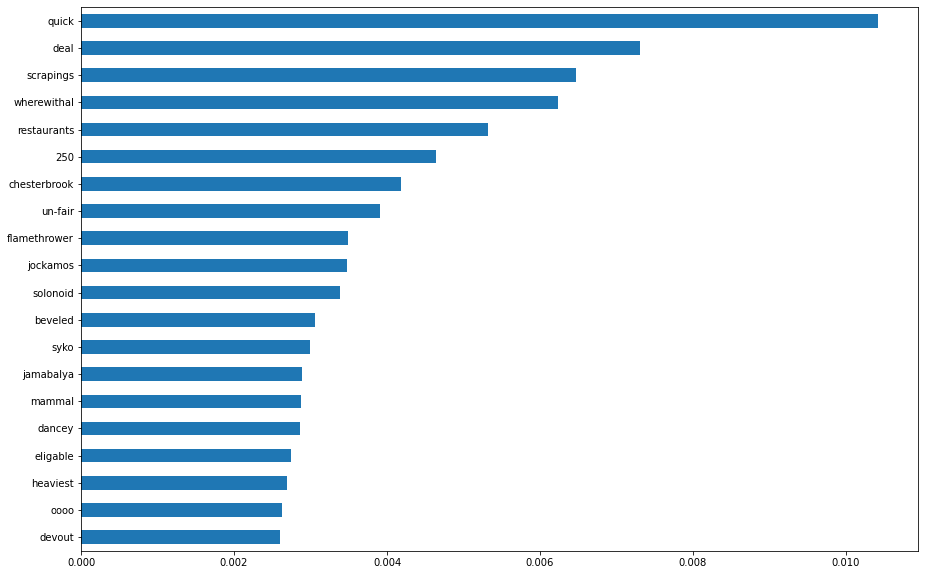

In [30]:
pd.Series(bow_model.feature_importances_, index = bow.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [29]:
bow_estimators = bow_model.estimators_
print('Number of trees:', len(bow_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 576.98


In [31]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

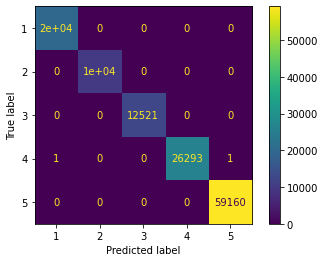

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

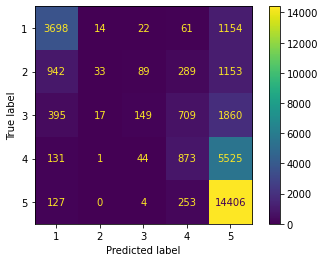

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [34]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_bow_predict, pos_label = 'positive'))
    print('Recall:', recall_score(y_train, y_train_bow_predict, pos_label = 'positive'))
    print('F1:', f1_score(y_train, y_train_bow_predict, pos_label = 'positive'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_bow_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_bow_predict, average = None))
    print('F1:', f1_score(y_train, y_train_bow_predict, average = None))

Precision: [0.99994949 1.         1.         1.         0.9999831 ]
Recall: [1.         1.         1.         0.99992394 1.        ]
F1: [0.99997474 1.         1.         0.99996197 0.99999155]


In [35]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
    print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
    print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
    print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.69865861 0.50769231 0.48376623 0.39954233 0.59780895]
Recall: [0.74722166 0.0131684  0.04760383 0.13279586 0.97403651]
F1: [0.72212459 0.02567095 0.0866783  0.19933782 0.74089693]
